In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [5]:
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


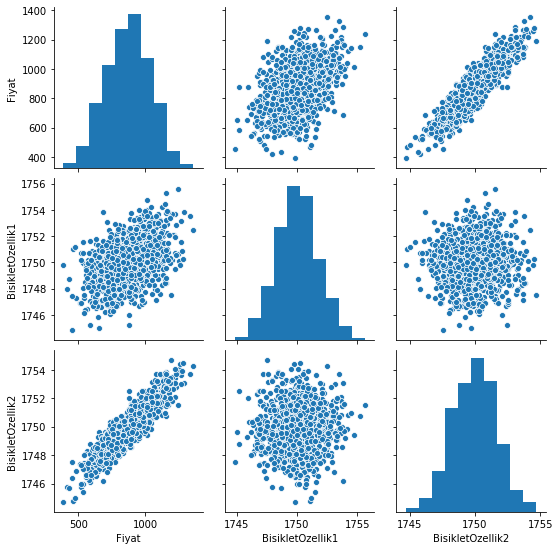

In [6]:
sns.pairplot(df)

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#train_test_split

In [9]:
# y = wx + b
# y -> label
y = df["Fiyat"].values

# x -> feature
x = df[["BisikletOzellik1", "BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 15)

In [10]:
x_train.shape

(670, 2)

In [11]:
y_train.shape

(670,)

In [12]:
x_test.shape

(330, 2)

#### scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse") # mse:mean squared error

In [21]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795861.3125
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 795767.8750
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 795671.3750
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795563.0000
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 795442.4375
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 795308.3125
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 795160.6875
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 794997.6875
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 794819.3125
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 794624.1875
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 794413.5625
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

21/21 [==============================] - 0s 1ms/step - loss: 439999.7188
Epoch 97/250
21/21 [==============================] - 0s 2ms/step - loss: 429018.4688
Epoch 98/250
21/21 [==============================] - 0s 2ms/step - loss: 417815.0312
Epoch 99/250
21/21 [==============================] - 0s 1ms/step - loss: 406459.3125
Epoch 100/250
21/21 [==============================] - 0s 2ms/step - loss: 394993.5938
Epoch 101/250
21/21 [==============================] - 0s 2ms/step - loss: 383431.4062
Epoch 102/250
21/21 [==============================] - 0s 1ms/step - loss: 371705.7500
Epoch 103/250
21/21 [==============================] - 0s 2ms/step - loss: 359893.0625
Epoch 104/250
21/21 [==============================] - 0s 2ms/step - loss: 347928.6562
Epoch 105/250
21/21 [==============================] - 0s 1ms/step - loss: 335949.0625
Epoch 106/250
21/21 [==============================] - 0s 1ms/step - loss: 323880.4688
Epoch 107/250
21/21 [==============================] - 0s 1m

21/21 [==============================] - 0s 1ms/step - loss: 2506.5615
Epoch 192/250
21/21 [==============================] - 0s 2ms/step - loss: 2460.1389
Epoch 193/250
21/21 [==============================] - 0s 1ms/step - loss: 2410.4695
Epoch 194/250
21/21 [==============================] - 0s 1ms/step - loss: 2360.3572
Epoch 195/250
21/21 [==============================] - 0s 2ms/step - loss: 2316.9529
Epoch 196/250
21/21 [==============================] - 0s 2ms/step - loss: 2273.2483
Epoch 197/250
21/21 [==============================] - 0s 1ms/step - loss: 2223.4458
Epoch 198/250
21/21 [==============================] - 0s 2ms/step - loss: 2176.5649
Epoch 199/250
21/21 [==============================] - 0s 2ms/step - loss: 2132.0779
Epoch 200/250
21/21 [==============================] - 0s 2ms/step - loss: 2083.5227
Epoch 201/250
21/21 [==============================] - 0s 1ms/step - loss: 2048.9497
Epoch 202/250
21/21 [==============================] - 0s 2ms/step - loss: 2005

In [56]:
loss = model.history.history["loss"]

KeyError: 'loss'

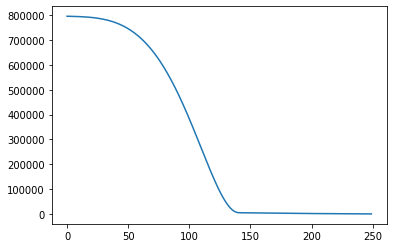

In [44]:
sns.lineplot(x = range(len(loss)), y = loss)

In [45]:
trainloss = model.evaluate(x_train, y_train, verbose=0)
testloss = model.evaluate(x_test, y_test, verbose=0)

In [46]:
testloss

463.6037292480469

In [47]:
trainloss

476.5964050292969

In [48]:
guesses = model.predict(x_test)

In [49]:
guesses.shape

(330, 1)

In [50]:
guesdf = pd.DataFrame(y_test, columns=["Gerçek Y"])

In [51]:
guesdf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [52]:
guesses = pd.Series(guesses.reshape(330,))

In [53]:
guesses

0      1055.768921
1       657.740295
2       879.284546
3       892.295105
4       896.435120
          ...     
325     999.929199
326     802.142090
327     782.966614
328    1135.343262
329     811.734924
Length: 330, dtype: float32

In [54]:
guesdf = pd.concat([guesdf, guesses], axis=1)

In [55]:
guesdf

,Gerçek Y,0
0,1081.652164,1055.768921
1,622.675990,657.740295
2,889.356810,879.284546
3,902.826733,892.295105
4,897.662404,896.435120
...,...,...
325,1028.438035,999.929199
326,789.934950,802.142090
327,758.490486,782.966614
328,1172.871659,1135.343262


In [35]:
guesdf.columns = ["Gerçek Y", "Tahmin Y"]

In [36]:
guesdf

,Gerçek Y,Tahmin Y
0,1081.652164,1055.768921
1,622.675990,657.740295
2,889.356810,879.284546
3,902.826733,892.295105
4,897.662404,896.435120
...,...,...
325,1028.438035,999.929199
326,789.934950,802.142090
327,758.490486,782.966614
328,1172.871659,1135.343262


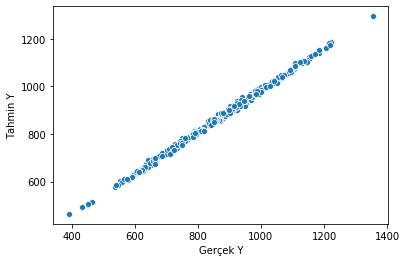

In [37]:
sns.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = guesdf)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mean_absolute_error(guesdf["Gerçek Y"], guesdf["Tahmin Y"])

17.27907633876776

In [40]:
mean_squared_error(guesdf["Gerçek Y"], guesdf["Tahmin Y"])

463.6036872607425

In [57]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [64]:
newbisikletozellikleri = [[1750, 1749]]

In [65]:
newbisikletozellikleri = scaler.transform(newbisikletozellikleri)

In [66]:
model.predict(newbisikletozellikleri)

array([[799.4077]], dtype=float32)